In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('data/height-weight.csv')
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0.5, 0, 'Weight (kg)')

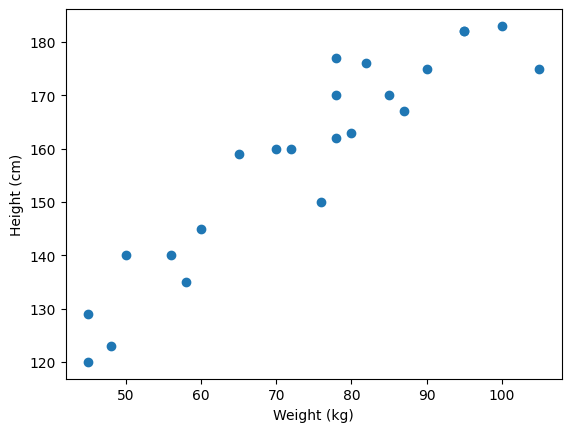

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.ylabel("Height (cm)")
plt.xlabel("Weight (kg)")

In [4]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


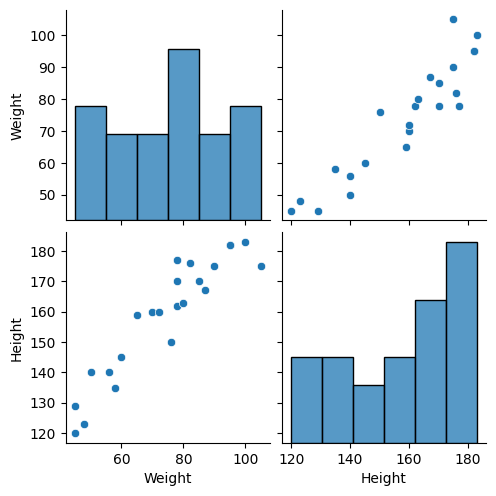

In [5]:
import seaborn as sns
sns.pairplot(df)

In [6]:
x = df[['Weight']]
y = df.Height
print(x,y)


    Weight
0       45
1       58
2       48
3       60
4       70
5       78
6       80
7       90
8       95
9       78
10      82
11      95
12     105
13     100
14      85
15      78
16      50
17      65
18      76
19      87
20      45
21      56
22      72 0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
x_train = scaler.fit_transform(x_train)
x_train 

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [14]:
x_test = scaler.transform(x_test)
x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=-1)
lr

LinearRegression(n_jobs=-1)

In [17]:
lr.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [18]:
lr.coef_


array([17.2982057])

In [19]:
lr.intercept_

156.47058823529412

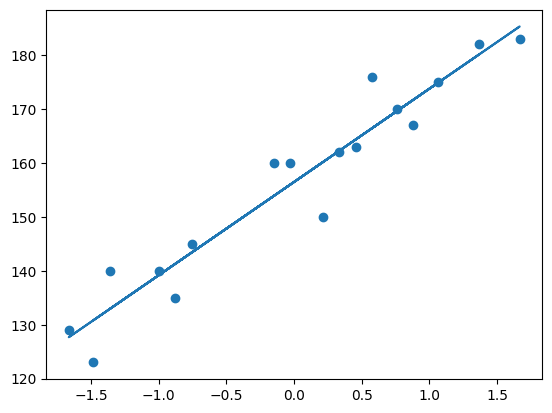

In [20]:
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train))

In [21]:
y_pred = lr.predict(x_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

114.84069295228699
9.66512588679501
10.716374991212605


In [26]:
from sklearn.metrics import r2_score

In [27]:
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [29]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6701033397476595

In [30]:
#OLS Simple Regression
import statsmodels.api as sm

In [32]:
model=sm.OLS(y_train,x_train).fit()
model

In [34]:
prediction=model.predict(x_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [35]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 09 Aug 2024   Prob (F-statistic):                       0.664
Time:                        19:02:36   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Rajpurohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
